In [1]:
import numpy as np
import pandas as pd
import sklearn
import seaborn as sn
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from scipy.stats import norm, skew 
from sklearn.model_selection import train_test_split
%matplotlib inline

import warnings
def ignore_warn(*args, **kwargs):
    pass
warnings.warn = ignore_warn

### Capstone Project: Predict Potential Sales of a Video Game

In this notebook I will be exploring a dataset of video game sales and attempting to make predictions on how much a game will sell depending on characteristics such as Genre, Critic Score, Critic Counts, User Score, User Counts, and the Rating.  The notebook will be broken down in the following parts:
1. Problem Definition
2. Data Reading
3. Evaluation of Data
4. Data Cleaning
5. Modelling
6. Experimentation

### 1. Problem Definition
The video game industry sells millions in video games, but it can be difficult to predict whether a game will be a success if it posts an average or even below-average critic score.  For example, a game classified as a shooter may attract high global scores without the benefit of having a high critic or user score attached to it.  Conversely, if a game has no exposure to critic or user reviews, can we guarantee it would sell enough to recoup the costs of developing the game?  With that in mind, the following problem definition comes to light:

How well can we predict the sales of a game, given its characteristics and scores, based on how much similarly-ranked games have sold in the past? 

### 2. Data

The data is downloaded from the following link: https://www.kaggle.com/rush4ratio/video-game-sales-with-ratings

The data contains sales metrics for video games released until 2016.

In [2]:
# loading the initial dataset and reading the first 10 rows

games = pd.read_csv('Video_Games_Sales_as_at_22_Dec_2016.csv')
games.head(10)

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8,322.0,Nintendo,E
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,NaN,NaN,NaN,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,709.0,Nintendo,E
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,73.0,8,192.0,Nintendo,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,NaN,NaN,NaN,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,Nintendo,23.20,2.26,4.22,0.58,30.26,NaN,NaN,NaN,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,Nintendo,11.28,9.14,6.50,2.88,29.80,89.0,65.0,8.5,431.0,Nintendo,E
7,Wii Play,Wii,2006.0,Misc,Nintendo,13.96,9.18,2.93,2.84,28.92,58.0,41.0,6.6,129.0,Nintendo,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,Nintendo,14.44,6.94,4.70,2.24,28.32,87.0,80.0,8.4,594.0,Nintendo,E
9,Duck Hunt,NES,1984.0,Shooter,Nintendo,26.93,0.63,0.28,0.47,28.31,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
# looking at the dataset info
games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16719 entries, 0 to 16718
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16717 non-null  object 
 1   Platform         16719 non-null  object 
 2   Year_of_Release  16450 non-null  float64
 3   Genre            16717 non-null  object 
 4   Publisher        16665 non-null  object 
 5   NA_Sales         16719 non-null  float64
 6   EU_Sales         16719 non-null  float64
 7   JP_Sales         16719 non-null  float64
 8   Other_Sales      16719 non-null  float64
 9   Global_Sales     16719 non-null  float64
 10  Critic_Score     8137 non-null   float64
 11  Critic_Count     8137 non-null   float64
 12  User_Score       10015 non-null  object 
 13  User_Count       7590 non-null   float64
 14  Developer        10096 non-null  object 
 15  Rating           9950 non-null   object 
dtypes: float64(9), object(7)
memory usage: 2.0+ MB


In [4]:
# describing the dataset further
games.describe(include='all')

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
count,16717,16719,16450.000000,16717,16665,16719.000000,16719.000000,16719.000000,16719.000000,16719.000000,8137.000000,8137.000000,10015,7590.000000,10096,9950
unique,11562,31,NaN,12,581,NaN,NaN,NaN,NaN,NaN,NaN,NaN,96,NaN,1696,8
top,Need for Speed: Most Wanted,PS2,NaN,Action,Electronic Arts,NaN,NaN,NaN,NaN,NaN,NaN,NaN,tbd,NaN,Ubisoft,E
freq,12,2161,NaN,3370,1356,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2425,NaN,204,3991
mean,NaN,NaN,2006.487356,NaN,NaN,0.263330,0.145025,0.077602,0.047332,0.533543,68.967679,26.360821,NaN,162.229908,NaN,NaN
std,NaN,NaN,5.878995,NaN,NaN,0.813514,0.503283,0.308818,0.186710,1.547935,13.938165,18.980495,NaN,561.282326,NaN,NaN
min,NaN,NaN,1980.000000,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.010000,13.000000,3.000000,NaN,4.000000,NaN,NaN
25%,NaN,NaN,2003.000000,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.060000,60.000000,12.000000,NaN,10.000000,NaN,NaN
50%,NaN,NaN,2007.000000,NaN,NaN,0.080000,0.020000,0.000000,0.010000,0.170000,71.000000,21.000000,NaN,24.000000,NaN,NaN
75%,NaN,NaN,2010.000000,NaN,NaN,0.240000,0.110000,0.040000,0.030000,0.470000,79.000000,36.000000,NaN,81.000000,NaN,NaN


### 3. Evaluation of Data

In order to hone in on the problem definition, we will be taking a look at a few variables as it relates to Global Sales, which is the goal of the predictor.  We will also be looking at some other aspects such as regional sales, and looking at Critic Scores and User Scores as it relates to the data.

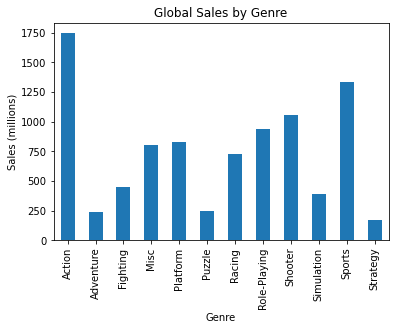

In [5]:
# the dependent variable is going to be the sales, but let's look at some data.

# Global sales by genre
salesByGenre = games.groupby(['Genre'])
salesByGenre = salesByGenre['Global_Sales'].agg(np.sum)
salesByGenre = salesByGenre.plot.bar().set(ylabel='Sales (millions)', title = 'Global Sales by Genre')

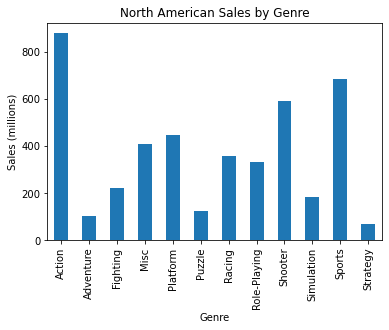

In [6]:
# North American sales by genre
naSalesByGenre = games.groupby(['Genre'])
naSalesByGenre = naSalesByGenre['NA_Sales'].agg(np.sum)
naSalesByGenre = naSalesByGenre.plot.bar().set(ylabel='Sales (millions)', title = 'North American Sales by Genre')

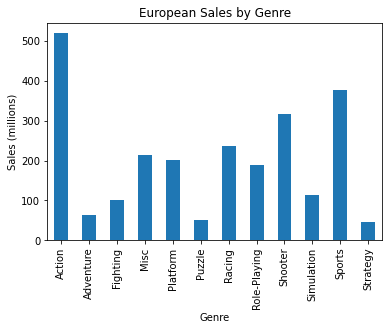

In [7]:
# European sales by genre
euSalesByGenre = games.groupby(['Genre'])
euSalesByGenre = euSalesByGenre['EU_Sales'].agg(np.sum)
euSalesByGenre = euSalesByGenre.plot.bar().set(ylabel='Sales (millions)', title = 'European Sales by Genre')

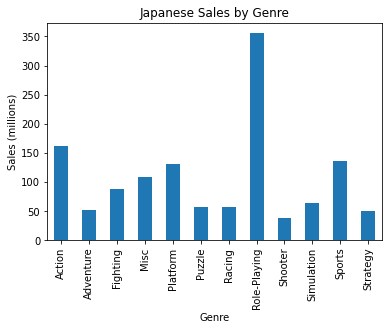

In [8]:
# Japan sales by genre
jpSalesByGenre = games.groupby(['Genre'])
jpSalesByGenre = jpSalesByGenre['JP_Sales'].agg(np.sum)
jpSalesByGenre = jpSalesByGenre.plot.bar().set(ylabel='Sales (millions)', title = 'Japanese Sales by Genre')

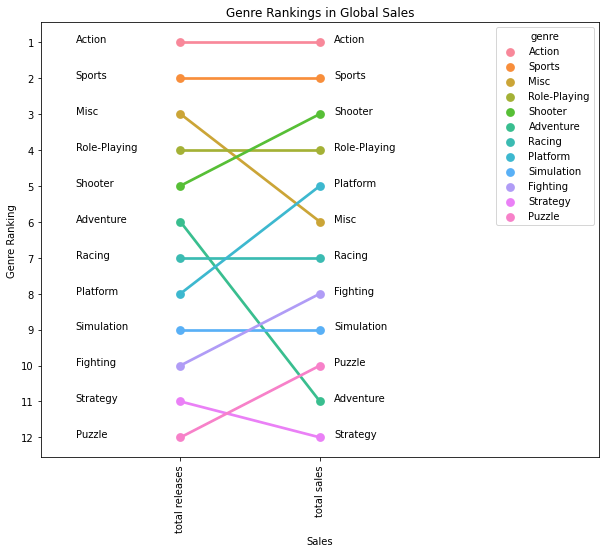

In [9]:
# visualization on how genres affect sales.
# first metric is number of releases per genre, second metric is the sales per genre

genreDifferenceMetric = [games.Genre.value_counts().index, 
                         games.groupby(['Genre']).sum().Global_Sales.sort_values(ascending=False).index]

# creating a dataframe for plotting this trend
genrePlotDF = pd.DataFrame(columns=['genre', 'rank_type', 'rank'])

# populate dataframe
for metric in range(2):
    for genre in range(len(genreDifferenceMetric[metric])):
        genrePlotDF = genrePlotDF.append({
            'genre':genreDifferenceMetric[metric][genre], 
            'rank_type': metric, 
            'rank':genre}, 
            ignore_index=True)
        
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111)

sns.pointplot(x=genrePlotDF.rank_type,
             y=12-genrePlotDF['rank'],
             hue=genrePlotDF.genre)

for i in range(len(genreDifferenceMetric[0])):
    ax.text(-0.75, 12-i, genreDifferenceMetric[0][i], fontsize=10)
    ax.text(1.1, 12-i, genreDifferenceMetric[1][i], fontsize=10)
    
ax.set_xlim([-1, 3])
    
xs = [0.0, 1.0]
x_labels = ['total releases', 'total sales']
plt.xticks(xs, x_labels, rotation='vertical')
ax.set_xlabel('Sales')

ys = range(1, 13)
y_labels = ['12', '11', '10', '9', '8', '7', '6', '5', '4', '3', '2', '1']
plt.yticks(ys, y_labels)
ax.set_ylabel('Genre Ranking')

plt.title('Genre Rankings in Global Sales')
plt.show();

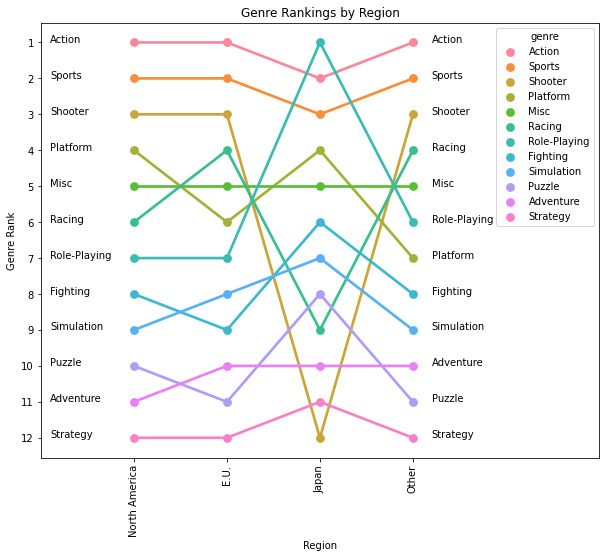

In [10]:
# let's break this down further in the different markets, not just global sales

# grouping the data by region first
genreGeoRank = [games.groupby('Genre').sum().unstack().NA_Sales.sort_values(ascending=False).index, 
                games.groupby('Genre').sum().unstack().EU_Sales.sort_values(ascending=False).index,
                games.groupby('Genre').sum().unstack().JP_Sales.sort_values(ascending=False).index,
                games.groupby('Genre').sum().unstack().Other_Sales.sort_values(ascending=False).index
                ]

# creating dataframe to house this visualization
genreGeoRankDF = pd.DataFrame(columns=['genre', 'rank_type', 'rank'])

#for metric in genre_difference_metric:
for region in range(4):
    for genre in range(len(genreGeoRank[region])):
        genreGeoRankDF = genreGeoRankDF.append({'genre':genreGeoRank[region][genre],
                                                'rank_type': region,
                                                'rank':genre},
                                               ignore_index=True)

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111)

sns.pointplot(x=genreGeoRankDF.rank_type,
              y=12-genreGeoRankDF['rank'], 
              hue=genreGeoRankDF.genre)

for i in range(len(genreGeoRank[0])):
    ax.text(-0.9, 12-i, genreGeoRank[0][i], fontsize=10)
    ax.text(3.2, 12-i, genreGeoRank[3][i], fontsize=10)
    
ax.set_xlim([-1,5])

xs = [0.0, 1.0, 2.0, 3.0]
x_labels = ['North America', 'E.U.', 'Japan', 'Other']
plt.xticks(xs, x_labels, rotation='vertical')
ax.set_xlabel('Region')

ys = range(1,13)
y_labels = ['12', '11', '10', '9', '8', '7', '6', '5', '4', '3', '2', '1']
plt.yticks(ys, y_labels)
ax.set_ylabel('Genre Rank')

plt.title('Genre Rankings by Region')
plt.show();

In [11]:
# it would be interesting to see if there are any "hits" (games that have sold greater than 1 million units)

# definining the "hit" metric
games['hits'] = (games['Global_Sales'] > 1)

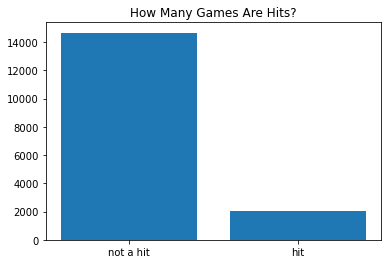

In [12]:
# graphing out the hits versus not hits
plt.bar(['not a hit', 'hit'], games['hits'].value_counts())
plt.title('How Many Games Are Hits?')
plt.show()

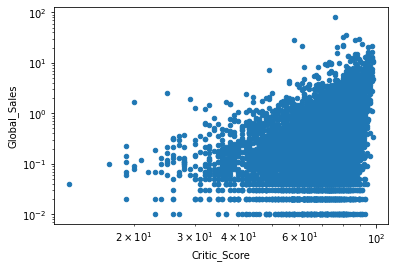

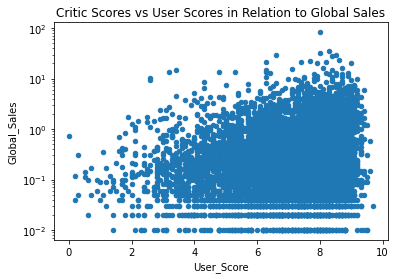

In [13]:
viz = games.filter(['User_Score','Critic_Score', 'Global_Sales'], axis=1)
viz['User_Score'] = pd.Series(viz['User_Score'].apply(pd.to_numeric, errors='coerce'))
# Critic_Score is out of 100 and User_Score is out of 10, so I'll convert the Critic_Score
viz['User_Score'] = viz['User_Score'].mask(np.isnan(viz["User_Score"]), viz['Critic_Score'] / 10.0)
viz.plot(kind='scatter', logx=True, logy=True, x='Critic_Score', y='Global_Sales')
viz.plot(kind='scatter', logx=False, logy=True, x='User_Score', y='Global_Sales')

plt.title('Critic Scores vs User Scores in Relation to Global Sales')
plt.show()

It appears Critic Scores and User Scores track very closely.  There also seems to be a pretty good relationship between scores and sales. Ratings could also be another factor in whether or not a game sells to a wider audience (for example, a game with an E rating may have more sales than one with an M rating).  Hopefully the model can learn these relationships as well as others. 

### 4.  Data Cleaning

Now that we have taken a look at the data, it's time to clean it.  Since there are a few established variables we would want to work with, the data cleaning will take the following steps:
1. Identify the metrics we want to keep
2. Look at how many NaN values we have
3. Determine whether to get rid of rows that contain NaN values, or fill them
4. Break apart the categorical metrics into a format more accessible to the machine learning model
5. Bring it all together into a dataset ready for fitting into a model

#### 4.1. Identifying metrics
So we are going to look at the following independent variables as it pertains to Global_Sales:
- Genre
- Critic_Score
- User_Score
- Rating

In [14]:
# dropping irrelevant columns from the dataset
games = games.drop(['Name', 'Platform', 'Year_of_Release',
                    'Publisher', 'NA_Sales', 'EU_Sales',
                    'JP_Sales', 'Other_Sales', 'Critic_Count',
                    'User_Count', 'Developer', 'hits'], axis=1)

#### 4.2. Looking at NaN values

Now that we have dropped all but the variables we want to work with, we move on with looking at null values.

In [15]:
# taking a look at how many null values there are
games.isnull().sum()

Genre              2
Global_Sales       0
Critic_Score    8582
User_Score      6704
Rating          6769
dtype: int64

In [16]:
# there are a lot of null values in Critic_Score, which is unfortunate.
# stripping out the rows with null Critic_Score
games.dropna(subset=['Critic_Score'], inplace=True)

# view the missing data again
games.isnull().sum()

Genre            0
Global_Sales     0
Critic_Score     0
User_Score      38
Rating          83
dtype: int64

#### 4.3 Fixing Data
Getting rid of the null Critic Scores has reduced our dataset significantly, so the rest of the values will be filled in to keep the dataset as intact as possible.

In [17]:
# first, the User_Score column.  

# there are some 'tbd' values that aren't numbers.  I'll need to convert them to NaN prior to filling them.
games['User_Score'].replace('tbd', np.nan, inplace=True)

In [18]:
# converting the User_Score column to float and filling in the NaN values with the mean
games['User_Score'].replace(np.nan, games['User_Score'].astype('float').mean(axis=0), inplace=True)

In [19]:
# converting the dtype to a numeric type
games['User_Score'] = pd.to_numeric(games['User_Score'])

In [20]:
# looking at the dataset once more
games.isnull().sum()

Genre            0
Global_Sales     0
Critic_Score     0
User_Score       0
Rating          83
dtype: int64

In [21]:
# the Rating column consists of letters, so I will fill the blank values with the most common value
games['Rating'].replace(np.nan, games['Rating'].value_counts().idxmax(), inplace=True)

In [22]:
# looking for any remaining null values in the dataset now
games.isnull().sum()

Genre           0
Global_Sales    0
Critic_Score    0
User_Score      0
Rating          0
dtype: int64

In [23]:
# exporting this new df into a csv for later consumption
games_interim_csv_data = games.to_csv('interim_games_data2.csv', index = True)

#### 4.4 Breaking apart the categorical values

Genre and Rating are filled with values that are not numerical.  To that end I will assign numerical values to the Genre and Rating columns.

In [24]:
# creating a new column for Genre called Genre_Numbered
games['Genre_Numbered'] = (games['Genre'])

Genres are broken out into 12 distinct categories: 
1. Action
2. Adventure
3. Fighting
4. Misc
5. Platform
6. Puzzle
7. Racing
8. Role-Playing
9. Shooter
10. Simulation
11. Sports
12. Strategy

In [25]:
games['Genre_Numbered'] = games['Genre_Numbered'].replace('Action', 1)
games['Genre_Numbered'] = games['Genre_Numbered'].replace('Adventure', 2)
games['Genre_Numbered'] = games['Genre_Numbered'].replace('Fighting', 3)
games['Genre_Numbered'] = games['Genre_Numbered'].replace('Misc', 4)
games['Genre_Numbered'] = games['Genre_Numbered'].replace('Platform', 5)
games['Genre_Numbered'] = games['Genre_Numbered'].replace('Puzzle', 6)
games['Genre_Numbered'] = games['Genre_Numbered'].replace('Racing', 7)
games['Genre_Numbered'] = games['Genre_Numbered'].replace('Role-Playing', 8)
games['Genre_Numbered'] = games['Genre_Numbered'].replace('Shooter', 9)
games['Genre_Numbered'] = games['Genre_Numbered'].replace('Simulation', 10)
games['Genre_Numbered'] = games['Genre_Numbered'].replace('Sports', 11)
games['Genre_Numbered'] = games['Genre_Numbered'].replace('Strategy', 12)

In [26]:
games

,Genre,Global_Sales,Critic_Score,User_Score,Rating,Genre_Numbered
0,Sports,82.53,76.0,8.000000,E,11
2,Racing,35.52,82.0,8.300000,E,7
3,Sports,32.77,80.0,8.000000,E,11
6,Platform,29.80,89.0,8.500000,E,5
7,Misc,28.92,58.0,6.600000,E,4
...,...,...,...,...,...,...
16700,Shooter,0.01,61.0,5.800000,T,9
16701,Puzzle,0.01,53.0,7.182428,E,6
16702,Puzzle,0.01,48.0,7.182428,E,6
16706,Strategy,0.01,60.0,7.200000,E10+,12


Additionally, there are different rating categories:
1. E - Everyone
2. E10+ - Everyone 10+
3. T - Teens and up
4. M - Mature
5. AO - Adults-Only
6. RP - Rating Pending
7. K-A - Kids-Adults

The last rating was a rating used prior to E10+ being introduced, so I will be replacing the K-A values with E10+ as a usable equivalent.

In [27]:
# creating a new column called Rating_Numbered
games['Rating_Numbered'] = (games['Rating'])

In [28]:
# replacing the K-A with E10+
games['Rating_Numbered'] = games['Rating_Numbered'].replace('K-A', 'E10+')

In [29]:
# assigning numbers
games['Rating_Numbered'] = games['Rating_Numbered'].replace('E', 1)
games['Rating_Numbered'] = games['Rating_Numbered'].replace('E10+', 2)
games['Rating_Numbered'] = games['Rating_Numbered'].replace('T', 3)
games['Rating_Numbered'] = games['Rating_Numbered'].replace('M', 4)
games['Rating_Numbered'] = games['Rating_Numbered'].replace('AO', 5)
games['Rating_Numbered'] = games['Rating_Numbered'].replace('RP', 6)

In [30]:
games

,Genre,Global_Sales,Critic_Score,User_Score,Rating,Genre_Numbered,Rating_Numbered
0,Sports,82.53,76.0,8.000000,E,11,1
2,Racing,35.52,82.0,8.300000,E,7,1
3,Sports,32.77,80.0,8.000000,E,11,1
6,Platform,29.80,89.0,8.500000,E,5,1
7,Misc,28.92,58.0,6.600000,E,4,1
...,...,...,...,...,...,...,...
16700,Shooter,0.01,61.0,5.800000,T,9,3
16701,Puzzle,0.01,53.0,7.182428,E,6,1
16702,Puzzle,0.01,48.0,7.182428,E,6,1
16706,Strategy,0.01,60.0,7.200000,E10+,12,2


In [31]:
games.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8137 entries, 0 to 16709
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Genre            8137 non-null   object 
 1   Global_Sales     8137 non-null   float64
 2   Critic_Score     8137 non-null   float64
 3   User_Score       8137 non-null   float64
 4   Rating           8137 non-null   object 
 5   Genre_Numbered   8137 non-null   int64  
 6   Rating_Numbered  8137 non-null   int64  
dtypes: float64(3), int64(2), object(2)
memory usage: 508.6+ KB


In [32]:
# dropping the orginial Genre and Rating columns
games.drop(['Genre', 'Rating'], axis=1, inplace=True)

#### 4.5 Bringing it all together
Now that the data is numeric, we can finally have it prepped for the model

In [33]:
games.reset_index(drop=True, inplace=True)

In [34]:
# the prepped data
games

,Global_Sales,Critic_Score,User_Score,Genre_Numbered,Rating_Numbered
0,82.53,76.0,8.000000,11,1
1,35.52,82.0,8.300000,7,1
2,32.77,80.0,8.000000,11,1
3,29.80,89.0,8.500000,5,1
4,28.92,58.0,6.600000,4,1
...,...,...,...,...,...
8132,0.01,61.0,5.800000,9,3
8133,0.01,53.0,7.182428,6,1
8134,0.01,48.0,7.182428,6,1
8135,0.01,60.0,7.200000,12,2


In [35]:
# exporting this new df into a csv for later consumption
games_csv_data = games.to_csv('final_games_data.csv', index = True)

In [36]:
# before moving further, I want to do one more visualization, a PCA
# making a copy of the games dataframe
gamesPCA = games.copy()

In [37]:
# adding the 'hits' category back to make PCA easier
gamesPCA['hit'] = (games['Global_Sales'] > 1).astype(int)

In [38]:
# dropping global_sales
gamesPCA.drop('Global_Sales', axis=1, inplace=True)

In [39]:
gamesPCA.head()

,Critic_Score,User_Score,Genre_Numbered,Rating_Numbered,hit
0,76.0,8.0,11,1,1
1,82.0,8.3,7,1,1
2,80.0,8.0,11,1,1
3,89.0,8.5,5,1,1
4,58.0,6.6,4,1,1


In [40]:
gamesPCA_csv = gamesPCA.to_csv('gamesPCA.csv', index = True)

In [47]:
import chart_studio.plotly as py
import plotly.express as px
from sklearn.decomposition import PCA

gamesPCAVisual = pd.read_csv('gamesPCA.csv')
features = ['Critic_Score', 'User_Score', 'Genre_Numbered', 'Rating_Numbered']

pca = PCA()
components = pca.fit_transform(gamesPCAVisual[features])

total_var = pca.explained_variance_ratio_.sum() * 100

labels = {
    str(i): f"PC {i+1} ({var:.1f}%)" 
    for i, var in enumerate(pca.explained_variance_ratio_ * 100)
}
labels['color'] = 'Hit or No Hit'

fig = px.scatter_matrix(components,
                        labels=labels,
                        dimensions=range(4), 
                        color=gamesPCAVisual.hit, 
                        title=f'PCA of Metrics Related to Sales > 1 Million')
fig.update_traces(diagonal_visible=False)
fig.show()

fig.write_html("templates/pca-visualization.html", include_plotlyjs="cdn")

### 5. Modelling

Now that the data is prepped, it's time to fit a model.  For this project I will be testing a Random Forest Regression Model.

In [43]:
# time to split the data and make test/training sets

# populating an array for X, which will be our independent variables
X = games.drop('Global_Sales', axis=1)

In [44]:
X = X.iloc[:,:].values

In [45]:
# populating y array for the dependent variable Global_Sales
y = games[['Global_Sales']].values

In [46]:
# splitting the model into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# checking the splits
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(6509, 4)
(1628, 4)
(6509, 1)
(1628, 1)


In [47]:
# let's try a model
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor(n_jobs=-1,
                             random_state=0)
model.fit(X_train, y_train)

RandomForestRegressor(n_jobs=-1, random_state=0)

In [48]:
y_pred = model.predict(X_test)

In [49]:
y_test

array([[0.49],
       [0.08],
       [0.74],
       ...,
       [0.17],
       [0.92],
       [0.17]])

In [50]:
y_pred

array([0.72274667, 0.084     , 0.88503333, ..., 0.1012    , 0.3505    ,
       0.43098   ])

In [51]:
model.score(X_test, y_test)

-0.19604556890949065

In [52]:
from sklearn.metrics import r2_score,mean_squared_error
from sklearn import metrics

# Calculate error
y_pred
print('ERROR ANALYSIS:\n')
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

ERROR ANALYSIS:

Mean Absolute Error: 0.67456983869543
Mean Squared Error: 2.5891665907361663
Root Mean Squared Error: 1.6090887454507183


In [53]:
## hyperparameter tuning

from sklearn.model_selection import RandomizedSearchCV
# Different RandomForestRegressor hyperparameters
rf_grid = {"n_estimators": np.arange(10, 100, 10),
           "max_depth": [None, 3, 5, 10],
           "min_samples_split": np.arange(2, 20, 2),
           "min_samples_leaf": np.arange(1, 20, 2),
           "max_features": [0.5, 1, "sqrt", "auto"],
           "max_samples": [3000]}

# Instantiate RandomizedSearchCV model
rs_model = RandomizedSearchCV(RandomForestRegressor(n_jobs=-1,
                                                    random_state=42),
                              param_distributions=rf_grid,
                              n_iter=2,
                              cv=5,
                              verbose=True)

# Fit the RandomizedSearchCV model
rs_model.fit(X_train, y_train)

Fitting 5 folds for each of 2 candidates, totalling 10 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    7.1s finished


RandomizedSearchCV(cv=5,
                   estimator=RandomForestRegressor(n_jobs=-1, random_state=42),
                   n_iter=2,
                   param_distributions={'max_depth': [None, 3, 5, 10],
                                        'max_features': [0.5, 1, 'sqrt',
                                                         'auto'],
                                        'max_samples': [3000],
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': array([10, 20, 30, 40, 50, 60, 70, 80, 90])},
                   verbose=True)

In [54]:
# Find the best model hyperparameters
rs_model.best_params_

{'n_estimators': 60,
 'min_samples_split': 2,
 'min_samples_leaf': 17,
 'max_samples': 3000,
 'max_features': 'sqrt',
 'max_depth': None}

In [55]:
# re-running the model with the parameters found

newModel = RandomForestRegressor(n_estimators=60,
                                 min_samples_split=2,
                                 min_samples_leaf=17,
                                 max_samples=3000,
                                 max_features='sqrt',
                                 max_depth=None,
                                 random_state=42)
newModel.fit(X_train, y_train)

RandomForestRegressor(max_features='sqrt', max_samples=3000,
                      min_samples_leaf=17, n_estimators=60, random_state=42)

In [56]:
newModel.score(X_test, y_test)

0.25646710595270095

In [57]:
pred = newModel.predict(X_test)

In [58]:
y_test

array([[0.49],
       [0.08],
       [0.74],
       ...,
       [0.17],
       [0.92],
       [0.17]])

In [59]:
pred

array([0.51606954, 0.11202385, 0.89390282, ..., 0.30261723, 0.48200135,
       0.38624532])

In [60]:
from sklearn.metrics import r2_score,mean_squared_error
from sklearn import metrics

# Calculate error
pred
print('ERROR ANALYSIS:\n')
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, pred)))

ERROR ANALYSIS:

Mean Absolute Error: 0.6039089310163782
Mean Squared Error: 1.6095795832728192
Root Mean Squared Error: 1.2686920758295999


In [61]:
# packaging up the newModel
import pickle
pickle.dump(newModel, open('models/predictor.pkl', 'wb'))